In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz, simps


In [2]:
def f(x):
    return 4/(1+x**2)

In [3]:
def mid_point_rule(a, b, m):
    h = (b - a) / (2 * m)
    x = np.linspace(a + h, b - h, m)
    return 2 * h * np.sum(f(x))

def trapezoidal_rule(a, b, m):
    h = (b - a) / m
    x = np.linspace(a, b, m + 1)
    return h / 2 * (f(x[0]) + 2 * np.sum(f(x[1:-1])) + f(x[-1]))

def simpson_rule(a, b, m):
    h = (b - a) / (2 * m)
    x = np.linspace(a, b, 2 * m + 1)
    return h / 3 * (f(x[0]) + 4 * np.sum(f(x[1:-1:2])) + 2 * np.sum(f(x[2:-2:2])) + f(x[-1]))

In [4]:
def calculate_integral(a, b, m, method):
    return method(a, b, m)

def calculate_error(a, b, m, method):
    return np.abs(np.pi - calculate_integral(a, b, m, method))

def calculate_errors(a, b, m, method):
    errors = []
    for i in range(1, m + 1):
        errors.append(calculate_error(a, b, i, method))
    return errors

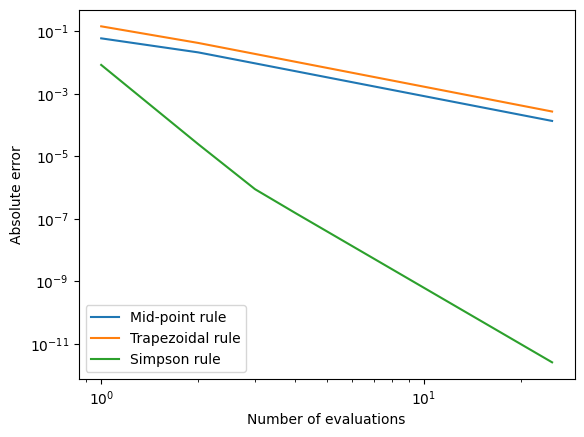

In [5]:
a = 0
b = 1
m = 25

mid_point_errors = calculate_errors(a, b, m, mid_point_rule)
trapezoidal_errors = calculate_errors(a, b, m, trapezoidal_rule)
simpson_errors = calculate_errors(a, b, m, simpson_rule)

n = np.arange(1, m + 1)
plt.plot(n, mid_point_errors, label='Mid-point rule')
plt.plot(n, trapezoidal_errors, label='Trapezoidal rule')
plt.plot(n, simpson_errors, label='Simpson rule')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of evaluations')
plt.ylabel('Absolute error')
plt.legend()
plt.show()

In [6]:
#b)

In [7]:
#c)

In [8]:
from numpy.polynomial.legendre import leggauss as gauss


In [9]:
def gauss_legendre_rule(a, b, n):
    x, w = gauss(n)
    return np.sum(w * f((b - a) / 2 * x + (a + b) / 2))

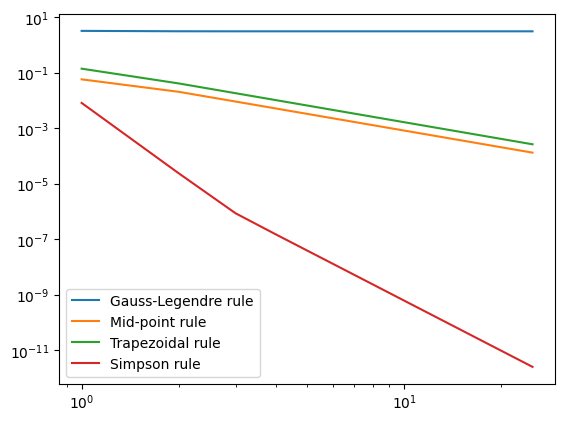

In [10]:
gauss_legendre_errors = calculate_errors(a, b, m, gauss_legendre_rule)

n = np.arange(1, m + 1)
plt.plot(n, gauss_legendre_errors, label='Gauss-Legendre rule')
plt.plot(n, mid_point_errors, label='Mid-point rule')
plt.plot(n, trapezoidal_errors, label='Trapezoidal rule')
plt.plot(n, simpson_errors, label='Simpson rule')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()